# Supervised Learning (Chapter 5)

There are two broad classes of machine learning tasks:
1. Supervised Learning: training set with desired outputs available
2. Unsupervised Learning: no labels available; algorithm has to find structure on its own.

This module focuses on a particular class of supervised machine learning: classification, where we have a finite number of choices to label an observation. 

Goals for this module:
* Exposure to the Scikit-learn toolbox
* Metrics to evaluate performance of ML algorithm
* Training / Validation / Testing
* Awareness of some ML algorithms and their mathematical foundations

# Problem Statement

We are given $n$ samples of data which belong to two (or more) classes.   We want to utilize an algorithm to learn from these already labeled data in order to predict the class of unlabeled data.  Each data has at least one feature (a.k.a. attribute).  We sometimes refer to this data as *multi-variate* data.  The terminology used in the ML domain varies greatly.  
* features / attributes / dimensions / regressors / covariates / predictors / independent variables are used interchangably.
* samples / instances / examples 
* classes / label / outcome / response / dependent variable

We will make use of sci-kit learn, https://en.wikipedia.org/wiki/Scikit-learn, which has various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means clustering.

# Input data for Scikit-learn

Sci-kit learn input data is structured in Numpy arrays, organized as $$X := n\_samples \times n\_features$$.


In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets # import standard datasets

iris = datasets.load_iris() # load iris data set

The sample datasets are dictionary objects that hold the data and some related metadata. 

In [2]:
print(iris)

{'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='|S10'), 'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4

The actual feature array is stored in the .data member

In [3]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
features = iris.data.shape[1]
samples = iris.data.shape[0]
print "number of samples = %g, number of features = %g"%(samples,features)

number of samples = 150, number of features = 4


# Learning and Predicting

All ML objects in Scikit-learn share a uniform API for learning and predicting, namely, fit() and predict().  We begin with the $k$ nearest neighbors (KNN) algorithm, which is a widely used technique because it can be evaluated very quickly, and it is easy to interpret the output. How does the KNN algorithm work?  For each test sample:
1. Pick a value of $k$: the number of neighbors we wish to use for classification.
2. Compute some measure between the test sample and each training sample.  Often, one uses the Euclidean distance, but other metrics might be appropriate.
3. Sort the computed distances in increasing order based on distance values
4. for the $k$ closest training samples, return the most frequent class as the predicted class. 

In [5]:
from sklearn import neighbors
# create an instance of K-nearest neighbor classifer
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

# train the classifier using the all the samples, except the last one
knn.fit(iris.data[:-1], iris.target[:-1] )

# compute the prediction of the last sample according to the model
predict  = knn.predict(iris.data[-1:])

print "actual classification: " + iris.target_names[iris.target[-1]]
print "predicted classification: " + iris.target_names[predict[0]]


actual classification: virginica
predicted classification: virginica


It is difficult to visualize the classification boundary for four-dimensional data (sepal length, sepal width, petal length, petal width).  We could take a slice of the four-dimensional space to visualize the classification along two dimensions.  Instead, suppose we only fit the training samples using the first two features, sepal length and sepal width (in cm).  We can visualize the classification boundary for this classification by laying down a mesh, and running a predictor at the mesh values.

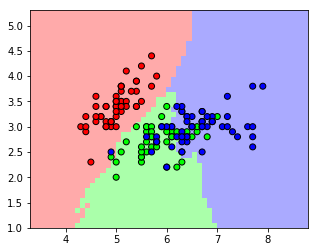

In [9]:
x = iris.data[:,:2] # take only the first two columns
y = iris.target

# train classifier
knn = neighbors.KNeighborsClassifier(n_neighbors = 41)
knn.fit(x, y)

# setup mesh
h = 0.1
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xg, yg = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# run classifier on mesh
z = knn.predict(np.c_[xg.ravel(), yg.ravel()])

# specifying some colors
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# plot classifier
zg = z.reshape(xg.shape)
_ = plt.figure()
_ = plt.pcolormesh(xg,yg,zg,cmap=cmap_light)

# overlay with training data points
_ = plt.scatter(x[:,0],x[:,1],c=y, cmap=cmap_bold, edgecolor='k')

# setting the aspect ratio so we can visualize distance properly
_ = plt.gca().set_aspect('equal')

# Performance measures

The most basic way to measure performance of a classifier is its accuracy, $$ acc = \frac{\text{Number of correct predictions}}{n}.$$  Lets return to the full iris data set, train the model on all the data, and run the predictor on the data.

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 11)

# train the classifier using the all the samples
knn.fit(iris.data, iris.target)

# compute the prediction each sample using the model
predict  = knn.predict(iris.data)

from sklearn.metrics import accuracy_score
accuracy_score(predict,iris.target)

0.9733333333333334

This is a surprisingly good model.  However, keep in mind that we have fit the model to the data, so we won't know how it will perform on unseen data.  We'll address this later.  First, one might need a more detailed analysis for the prediction of elements within classifications.  If we were doing a binary classification (e.g. true / false), we would normally present a confusion matrix, that compares the predictor to the ground truth
<table border=1px>
    <tr>
        <th></th>
        <th colspan=2 text-align="center">Ground Truth </th>
    </tr>
    <tr>
        <th>Prediction </th>
        <th>Positive</th>
        <th>Negative</th>
    </tr>
    <tr>
        <th> Positive </th>
        <td> TP </td>
        <td> FP </td>
    </tr>
    <tr>
        <th> Negative </th>
        <td> FN </td>
        <td> TN </td>
    </tr>
</table>
where 

* TP: true positives: classifier predicts a sample as positive in accordance with ground truth
* FP: false positive: classifier predicts a sample as positive in conflict with ground truth
* TN: true negative:  classifier predicts a sample as negative in accordance with ground truth
* FN: false negative: classifier predicts a sample as negative in conflict with ground truth

Note the similarity with the type-I and type-II error we saw previously in hypothesis testing. Using this notation, the accuracy is $$ \text{accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}.$$ There are a few additional metrics of interest:

* sensitivity: 
$$ \text{sensitivity} = \frac{\text{TP}}{\text{TP + FN}}$$
* specificity: $$ \text{specificity} = \frac{\text{TN}}{\text{TN + FP} }$$
* precision: $$ \text{precision} = \frac{\text{TP}}{\text{TP + FP} }$$
* Negative Predictive Value: $$ \text{NPV} = \frac{\text{TN}}{\text{TN + FN} }$$


Question: what do we do when there are more classes? well, we can generate a $k \times k$ matrix, where $k$ is the number of classes.  Four our iris example:
<table border=1px>
    <tr>
        <th></th>
        <th colspan=3 text-align="center">Ground Truth </th>
    </tr>
    <tr>
        <th>Prediction </th>
        <th>setosa</th>
        <th>versicolor</th>
        <th>virginica</th>       
    </tr>
    <tr>
        <th> setosa </th>
        <td> TC </td>
        <td> FC </td>
        <td> FC </td>
    </tr>
    <tr>
        <th> versicolor </th>
        <td> FC </td>
        <td> TC </td>
        <td> FC </td>
    </tr>
    <tr>
        <th> virginica </th>
        <td> FC </td>
        <td> FC </td>
        <td> TC </td>
    </tr>
</table>
where we now have

* TC: true classification
* FC: false classification, where you could even specify further by extending the idea of false negative or false positive, for example, falsely identified setosa as versicolor.

Lets generate the confusion matrix for our classification problem

In [11]:
C = np.empty([3,3])
for i in range(3):
    for j in range(3):
        C[i,j] = np.sum(np.logical_and(predict==i, iris.target==j))
print(C)

[[50.  0.  0.]
 [ 0. 48.  2.]
 [ 0.  2. 48.]]


Here, our classifier identifies all the setosa variety perfectly; it identified 48/50 versicolor correctly, and misclassified 2 versicolors as verginica; the classifier identified 48/50 virginica variety correctly, and misclassified 2 virginica varieties as versicolor.  In order to extend the performance metrics from the binary classification (i.e. sensitivity, specificity, precision or NPV), a pair-wise comparison is needed, i.e., setosa -- non-setosa, versicolor -- non-versicolor, virginica -- non-verginica.

Although the performance measures look pretty good, we have thus far checked the classifier performance on the same data that it has been trained on.  We have no way to measure how the model will behave on unlabeled data.  The common approach is to split the data into a **training** set and a **test** set.  

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=10)
# note: test_size is a number between 0 and 1,
# random_state is the seed used by the random number generator.  Here, I've fixed it to 10 for reproducibility

knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

# train the classifier using the training data
knn.fit(x_train, y_train)

# compute the prediction of the test set using the model
predict  = knn.predict(x_test)

from sklearn.metrics import accuracy_score
print "accuracy = %g "%(accuracy_score(predict,y_test))

accuracy = 0.96 


Calculating the confusion matrix:

In [13]:
C = np.empty([3,3])
for i in range(3):
    for j in range(3):
        C[i,j] = np.sum(np.logical_and(predict==i, y_test==j))
print(C)

[[15.  0.  0.]
 [ 0. 17.  0.]
 [ 0.  2. 16.]]


Which allows us to conclude that the classifier had a bit of problem trying to classify the verginica species. 

Of course, each time we randomly split the dataset, we will get a difference measure of performance.  A good simulation would run this classification experiment many times and average the performance.  Instead of computing the confusion matrix, we will just measure the accuracy (number of correctly identified species)

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 11)

accuracy = np.zeros((10,))

for i in xrange(10):
    # split the data
    x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

    # train the classifier using the training data
    knn.fit(x_train, y_train)

    # compute the prediction of the test set using the model
    predict  = knn.predict(x_test)

    accuracy[i] = accuracy_score(predict,y_test)

print "mean accuracy = %g "%(accuracy.mean())

mean accuracy = 0.975 


In [15]:
accuracy

array([0.96666667, 0.98333333, 0.96666667, 0.96666667, 0.96666667,
       0.98333333, 0.98333333, 0.96666667, 0.98333333, 0.98333333])

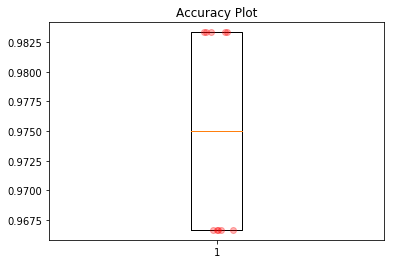

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Accuracy Plot')
_ = ax1.boxplot(accuracy) 
xderiv = np.ones(accuracy[:].shape)+(np.random.rand(10,)-0.5)*0.1
_ = plt.plot(xderiv,accuracy[:] ,'ro',alpha=0.3) # add a jigger plot of data points

I'm not sure if this data set is amenable to the following problem, but I thought we might try generating a figure similar to figure 5.2 for this data set.  (You would try creating this boxplot for various KNN models (with varying neighbors), support vector classifiers (SVC), and decision tree classifiers (see pg 77).  Next week, we will go into more depth regarding the SVC and decision trees.